<figure>
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
    <img src="../imagenes/Foto Alvaro Montenegro.png" width="40" height="40" align="right" /> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Simposio Internacional de Estadística 2024</center></span>

## <span style="color:green"><center>Minicurso de Inteligencia Artificial Moderna - Taller 3.1<center></span>

### <span style="color:green"><center>Autocodificador Variacional: FashionMNIST</center></span>

<figure>
<center>
<img src="../Imagenes/vae-diagram-1-1024x563.jpg" width="600" height="600" align="center"/>
</center>
</figure>

Fuente: [LearnOpenCV](https://learnopencv.com/variational-autoencoder-in-tensorflow/)

# <span style="color:#4361EE">Profesor</span>

## <span style="color:#4361EE">Alvaro  Mauricio Montenegro Díaz, Ph.D.</span>

## <span style="color:#4361EE">Introducción </span>

Para este taller utilizaremos los datos de FashioMNIST y la implementación esta hecha en Pytorch. El código fue generado con ChatGPT con el siguiente prompt:

## <span style="color:#4361EE">VAE</span>

Nuestro autocodificador (autoencoder) variacional (VAE) tendrá variables latentes gaussianas y una distribución posterior gaussiana   $q_{\phi}(\boldsymbol{z}|\boldsymbol{x})$  con una matriz de covarianza diagonal.

Recordemos que  un VAE de cuatro elementos escenciales:

1. Una  variable  latente $\boldsymbol{z}$ con distribución  $p(\boldsymbol{z})$  que en nuestro caso será una variable  aleatoria Gaussiana con media cero y varianza 1 y que denotamos   $\epsilon$.
2. Un decodificador(decoder)  $p(\boldsymbol{x}|\boldsymbol{z})$  que mapea las  variables latentes  $\boldsymbol{z}$  a variables observables $\boldsymbol{x}$. En este ejemplo este codificador implementa un perceptrón multicapa (MLP), en este caso una red neuronal con una capa oculta.
3. Un codificador (encoder)  $q_{\phi}(\boldsymbol{z}|\boldsymbol{x})$  que mapea ejemplos de entrada al espacio latente. Como se está cosntruyendo un autoencoder variacional se tiene que este mapeo se hace generando muestras aleatorias de distribciones Gaussianas con medias y varianzas que dependen de  la entrada:   $q_{\phi}(\boldsymbol{z}|\boldsymbol{x})=N(\boldsymbol{z},\boldsymbol{\mu}(x),\text{diag}(\boldsymbol{\sigma}^2(\boldsymbol{x})))$. 
4. Una función de costo que tiene dos términos: el  error de construcción que corresponde al modelo generativo implementado en el decoder y un término adicional de regularización que minimiza la divergencia KL. El error de reconstrucción es medido por el error cuadrático medio y la divergencia por el término
$-D_{KL}(q_{\phi}(\boldsymbol{z}|\boldsymbol{x})|p(\boldsymbol{z}))=\tfrac{1}{2}\sum_{j=1}^{J}(1+\log \boldsymbol{\sigma}^2_j(\boldsymbol{x})-\boldsymbol{\mu}^2_j(\boldsymbol{x})-\boldsymbol{\sigma}^2_j(\boldsymbol{x}))$.

## <span style="color:#4361EE">El truco de la reparametrización</span>

Los gradientes de propagación hacia atrás no pueden pasar por el bloque de muestreo estocástico. Si bien está bien tener entradas estocásticas para redes neuronales, no es posible  pasar los gradientes por una capa estocástica. La solución a este problema es eliminar el proceso de muestreo como entrada, como se muestra en el lado derecho de la siguiente figura. 

Desde el punto de vista estadístico, esto es bastante simple. Se usa la representación estocástica clásica de una distribución normal multivariada asi:

1. Genera una muestra $\boldsymbol{\epsilon} \sim \mathcal{N}_m(\mathbf{0}, \mathbf{I})$.
2. Obtiene $\mathbf{z} =\boldsymbol{\mu} + \boldsymbol{\epsilon} \odot  \boldsymbol{\sigma}$.

En consecuencia $\mathbf{z}\sim \mathcal{N}_m(\boldsymbol{\mu},\text{diag}( \boldsymbol{\sigma}^2))$.

## <span style="color:#4361EE">El El algortimo VAE para FashionMnist</span>

1. Un lote de datos $\boldsymbol{x}$ se transforma del espacio de entrada de tamaño image_size = 784 = 28*28,  a un espacio oculto intermedio (hidden) de tamaño hidden_dim = 512. Activación = ReLU.
2. Se hacen dos proyecciones lineales hacia el espacio latente de tamaño latent_dim = 10.
3. Una proyección se usara como representación de $\boldsymbol{\mu}(\boldsymbol{x})$ y el otro como representación de $\log \boldsymbol{\sigma}^2(\boldsymbol{x})$
4. Usando el truco de la reparametrización se genera un muestra $\boldsymbol{z}\sim \mathcal{N}(\boldsymbol{\mu}(\boldsymbol{x}), \boldsymbol{\sigma}^2(\boldsymbol{x}))$.
5. Se reconstruye la entrada (parte generativa). Esta recosntrucción se denota $\boldsymbol{x}^*$. Para lograrlo se proyecta el vector latente $\boldsymbol{z}$ al espacio intermedio de tamaño  hidden_dim = 512. Activación = ReLU.
7. En seguida se proyecta linealmente al espacio original de tamaño image_size = 784 = 28*28 y se usa activación sigmoide para llevar a la escala original (0,1).
8. Función de pérdida.
   1. Del modelo de probabilidad: LM = Entropia_Cruzada_Binaria($\boldsymbol{x}^* =, \boldsymbol{x})= $
   2. Se calcula el regularizadorque es la Divergencia LK= $-D_{KL}(q_{\phi}(\boldsymbol{z}|\boldsymbol{x})|p(\boldsymbol{z}))=\tfrac{1}{2}\sum_{j=1}^{J}(1+\log \boldsymbol{\sigma}^2_j(\boldsymbol{x})-\boldsymbol{\mu}^2_j(\boldsymbol{x})-\boldsymbol{\sigma}^2_j(\boldsymbol{x}))$.
   3. Pérdida total: L = LM + LK.
      

- [Regresar al inicio](#Contenido)
- [Ejemplo Auto Encoder Variacional para los datos de MNIST](VAE_Example_Dense_mnist.ipynb)

## <span style="color:#4361EE">El código</span>

In [4]:
# imports
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from torchviz import make_dot

In [30]:
# configuración
# Parámetros
image_size = 28 * 28  # Suponiendo imágenes de 28x28 píxeles
hidden_dim = 512
latent_dim = 10
num_epochs = 100
batch_size = 128
learning_rate = 0.0001  # tasa de aprendizaje

# Configurar el dispositivo (MPS o CPU). Para MAC OS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# tiene una GPU Nvidia
#device = torch.device("cuda" if torch.backends.mps.is_available() else "cpu")

In [28]:
# Clase VAE

class VAE(nn.Module):
    def __init__(self, dim):
        super(VAE, self).__init__()
        h_dim = dim[0]
        z_dim = dim[1]

        self.fc1 = nn.Linear(image_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)

        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, image_size)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)

    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var * 0.5)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode_logits(self, z):
        h = F.relu(self.fc4(z))
        return self.fc5(h)

    def decode(self, z):
        #return torch.sigmoid(self.decode_logits(z))
        return torch.tanh(self.decode_logits(z))
        
    def forward(self, inputs):
        mu, log_var = self.encode(inputs)
        z = self.reparameterize(mu, log_var)
        x_reconstructed_logits = self.decode_logits(z)
        return x_reconstructed_logits, mu, log_var

# Crear el modelo y moverlo al dispositivo
model = VAE([hidden_dim, latent_dim]).to(device)

In [21]:
# summary del modelo

model_cpy = VAE([hidden_dim, latent_dim]).to('cpu')
example_input = torch.randn(1, image_size).to('cpu')
summary(model_cpy, input_size=(1, image_size), device=str('cpu'))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         401,920
            Linear-2                [-1, 1, 10]           5,130
            Linear-3                [-1, 1, 10]           5,130
            Linear-4               [-1, 1, 512]           5,632
            Linear-5               [-1, 1, 784]         402,192
Total params: 820,004
Trainable params: 820,004
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 3.13
Estimated Total Size (MB): 3.15
----------------------------------------------------------------


In [24]:
# Diagrama del modelo

y = model_cpy(example_input)
make_dot(y, params=dict(model.named_parameters())).render("VAE", format="png")

#print("Diagrama del modelo generado y guardado como simple_nn.png.")


del model_cpy, example_input

`make_dot`:Produce una representación Graphviz del grafo de autograd de PyTorch.

1. Si un nodo representa una función de retropropagación, es de color gris. De lo contrario, el nodo representa un tensor y es de color azul, naranja o verde:
2. `Azul`: tensores hoja alcanzables que requieren gradiente (tensores cuyos campos .grad se poblarán durante .backward())
3. `Naranja`: tensores guardados de funciones de autograd personalizadas, así como aquellos guardados por nodos de retropropagación incorporados
4. `Verde`: tensor pasado como salida
5. `Verde oscuro`: si alguna salida es una vista, representamos su tensor base con un nodo de color verde oscuro.

<figure>
<center>
<img src="../Imagenes/VAE.png" width="500" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Implementación de un  Autoencoder Variacional</p>
</figcaption>
</figure>

In [31]:
# Configurar el optimizador
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Función para calcular la pérdida (ejemplo)
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

# Función de entrenamiento
def train(model, train_loader, optimizer, device):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.view(-1, image_size).to(device)  # Mover los datos al dispositivo y aplanarlos
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    return train_loss / len(train_loader.dataset)

# Función de evaluación (opcional)
def evaluate(model, test_loader, device):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.view(-1, image_size).to(device)  # Mover los datos al dispositivo y aplanarlos
            recon_batch, mu, log_var = model(data)
            test_loss += loss_function(recon_batch, data, mu, log_var).item()
    test_loss /= len(test_loader.dataset)
    print(f'Test loss: {test_loss}')

# Cargar el conjunto de datos y aplicar transformaciones
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Entrenar el modelo
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, device)
    print(f'Epoch {epoch + 1}/{num_epochs} completed with loss {train_loss}')

# Evaluar el modelo (opcional)
evaluate(model, test_loader, device)

Epoch 1/100 completed with loss 111.25989270833334
Epoch 2/100 completed with loss 120.2188626953125
Epoch 3/100 completed with loss 127.20380782877604
Epoch 4/100 completed with loss 140.63372373046874
Epoch 5/100 completed with loss 138.89846977539062
Epoch 6/100 completed with loss 140.8459773111979
Epoch 7/100 completed with loss 125.10913318684896
Epoch 8/100 completed with loss 129.2672333170573
Epoch 9/100 completed with loss 116.37011481119792
Epoch 10/100 completed with loss 119.83388494466146
Epoch 11/100 completed with loss 141.65169254557293
Epoch 12/100 completed with loss 124.1757288248698
Epoch 13/100 completed with loss 124.48019659830729
Epoch 14/100 completed with loss 120.80416931966145
Epoch 15/100 completed with loss 119.1641140625
Epoch 16/100 completed with loss 128.67792604166667
Epoch 17/100 completed with loss 115.99391487630209
Epoch 18/100 completed with loss 118.95109137369792
Epoch 19/100 completed with loss 123.02981985677083
Epoch 20/100 completed with l

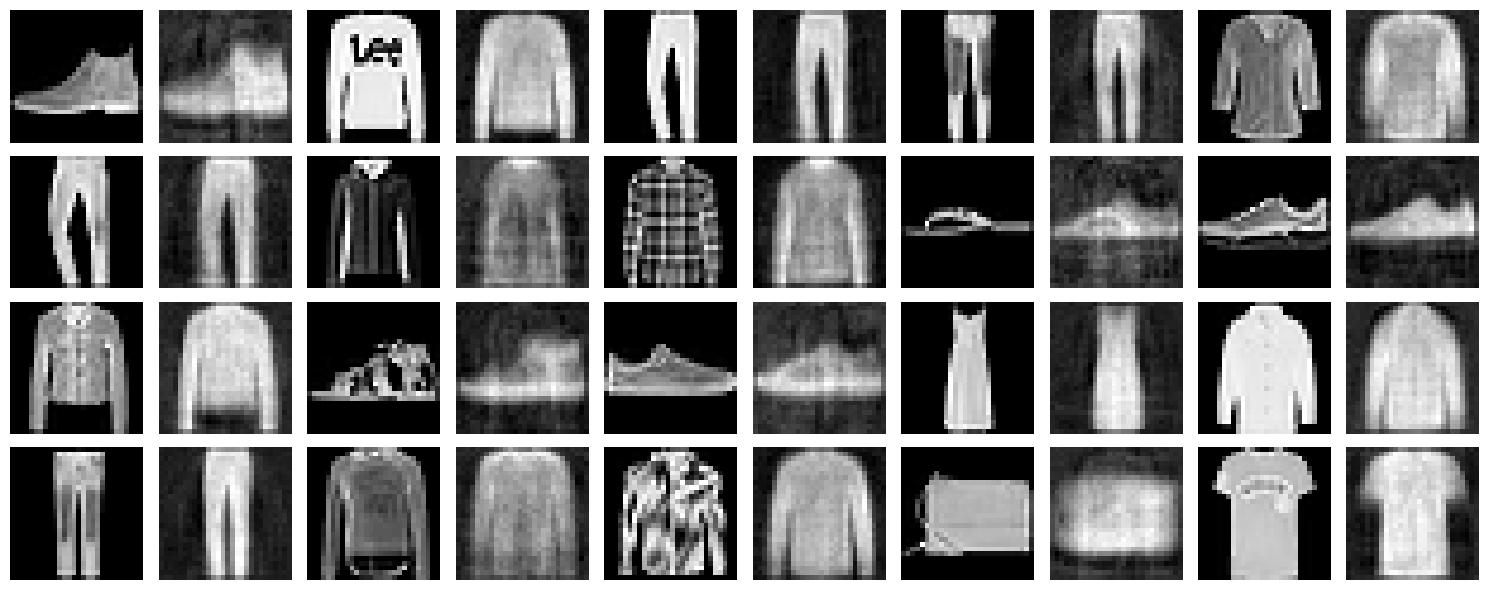

In [36]:
# Evaluar y mostrar las reconstrucciones de las imágenes del conjunto de prueba

model.eval()
with torch.no_grad():
    data_iter = iter(test_loader)
    images, _ = next(data_iter)
    images = images[:20].to(device)  # Obtener las primeras 20 imágenes
    data = images.view(-1, image_size).to(device)
    recon_images, _, _ = model(data)

# Desnormalizar las imágenes para visualización
images = images.cpu().numpy()
recon_images = recon_images.cpu().numpy()

images = images * 0.5 + 0.5  # Desnormalizar
recon_images = recon_images * 0.5 + 0.5  # Desnormalizar

# Mostrar las imágenes originales y reconstruidas
fig, axes = plt.subplots(4, 10, figsize=(15, 6))
for i in range(20):
    axes[i // 5, (i % 5) * 2].imshow(images[i].reshape(28, 28), cmap='gray')
    axes[i // 5, (i % 5) * 2].axis('off')
    axes[i // 5, (i % 5) * 2 + 1].imshow(recon_images[i].reshape(28, 28), cmap='gray')
    axes[i // 5, (i % 5) * 2 + 1].axis('off')

plt.tight_layout()
plt.show()